<img src="extras/FD.gif" width="1000" height="100"></img>
<hr>
<img src="extras/dataM3.gif" ></img>
<hr>

<u><font color="#1E9CC6" face="Edwardian Script ITC" size="22"> Définition de la fouille de données</font></u>

<u>La fouille de données</u> est un domaine qui est apparu avec l’explosion des quantités d’informations stockées, avec le progrès important des vitesses de traitement et des supports
de stockage. La fouille de données vise à découvrir, dans les grandes quantités de données,les informations précieuses qui peuvent aider à comprendre les données ou à prédire le
comportement des données futures. Le datamining utilise depuis sont apparition plusieurs outils de statistiques et d’intelligence artificielle pour atteindre ses objectifs.

<u><font color="#1E9CC6" face="Edwardian Script ITC" size="22"> Processus du data mining</font></u>

Il est très important de comprendre que le data mining n’est pas seulement le problème de découverte de modèles dans un ensemble de donnée. Ce n’est qu’une seule étape dans
tout un processus suivi par les scientifiques, les ingénieurs ou toute autre personne qui cherche à extraire les connaissances à partir des données. 
En 1996 un groupe d’analystes définit le data mining comme étant un processus composé de cinq étapes sous le standard <b><u> CRISP-DM (Cross-Industry Standard Process for Data Mining) </u></b> comme schématisé cidessous
:

<img src="extras/CRISP_DM.png" width="1000" height="100" ></img>


<u><font color="#DE26B6" face="Bitstream Vera Serif Bold" size="5">1. La compréhension du problème métier</font></u>


La première étape consiste à bien comprendre les éléments métiers et problématiques que la Data Science vise
à résoudre ou à améliorer.
<hr>

<font color="#0316E2"  size="3"> L'objectif de notre projet consiste à</font>
<br><br>
• Maitriser l’API de twitter pour l’extraction des tweets 
<br>
• Maitriser la partie NLP (natural language processing) avec NLTK en Python
<br>
• Appliquer les principes de nettoyage des données
<br>
• Classer les tweets : regrouper ensemble les tweets qui sont similaires. 

<u><font color="#DE26B6" face="Bitstream Vera Serif Bold" size="4">1.1 Collecte des données</font></u>


Dans cette étape, on s’intéresse à la manière dont les données sont générées et collectées. D’après la définition du problème et des objectifs du data mining, on peut avoir une idée sur les données qui doivent être utilisées. Ces données n’ont pas toujours le même format et la même structure.
<hr>

Les données utilisées sont extraites de Twitter à l'aide de<u> Tweepy,</u> une bibliothèque python permettant d'accéder à l'API Twitter.

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tweepy as tw
import pandas as pd
import numpy as np
import nltk 
import string
import re
import string

# better viewing of tweet text
pd.set_option('display.max_colwidth', 150)
# reproducible rng
seed = 42
plt.style.use("bmh")
#%matplotlib inline

consumer_key = "Tippg04Ns8bfIZtE3uMprKEym" 
consumer_secret = "qHjBkD4CBX67rHPenKu96c7W5Tsv59t9BGBVsm0pXM0oLatOS8"
access_token= "1328070400136400905-ZOCtds4L0DD3LqMJ2r9rZHSyAi75Xu"
access_token_secret = "qX3pBBD42A1dAZDPXx2DGcH0T0hcr4e5Oxw40YwR9wTnc"

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True, compression=True)

In [141]:
dataSet_tweets1= pd.read_csv('data.csv')
dataSet_tweets2= pd.read_csv('dataa.csv')
dataSet_tweets3= pd.read_csv('dataaa.csv')
dataSet_tweets1.columns, dataSet_tweets2.columns, dataSet_tweets3.columns = ['ID','User','Date','Tweet','Len'], ['ID','User','Date','Tweet','Len'], ['ID','User','Date','Tweet','Len']
dataSet_tweets = pd.concat([dataSet_tweets1, dataSet_tweets2, dataSet_tweets3], ignore_index=True)


Après avoir collecté les données a partir de l'API twitter on a concatiné les 3 fichiers CSV pour avoir un nombre de tweet égale à 10000

<u><font color="#DE26B6" face="Bitstream Vera Serif Bold" size="5">2. La compréhension des données</font></u>


Cette phase vise à déterminer précisément les données à analyser, à identifier la qualité des données disponibles et à faire le lien entre les données et leur signification d’un point de vue métier. La Data Science étant basée sur les données seules, les problèmes métiers relatifs à des données existantes,
qu’elles soient internes ou externes, peuvent ainsi être résolus par la Data Science.

In [142]:
style_dict = {'background-color':'#31C7FA',
              'color':'black',
              'border-color': 'white',
              'border-width':'2px',
              'font-family':'Roboto'}
# Affichage des 4 premières lignes
dataSet_tweets.head().style.set_properties(**style_dict)


,ID,User,Date,Tweet,Len
0,1336858921605197824,AlanHerringtonn,2020-12-10 02:22:59,I wish every band would find success :(,39
1,1336858921592639488,tina29073,2020-12-10 02:22:59,"RT @Franklin_Graham: Concerns with the voting machines, software, mail-in ballots, counting procedures, and more seem to be growing every d…",140
2,1336858921563250688,JPHUPE,2020-12-10 02:22:59,That’s more like it https://t.co/vMgy7wuOnl,43
3,1336858921563205634,fellawhomstdve,2020-12-10 02:22:59,"three hours into ambien and tweeting and she gives you this look, wyd https://t.co/YwzAbalKM4",93
4,1336858921529651206,jjgisjjg,2020-12-10 02:22:59,RT @BBCWorld: New Christmas campaign for Canadians held in China https://t.co/ke7qlriuGc,88


In [143]:
print("DataFrame's shape : ", dataSet_tweets.shape)

DataFrame's shape :  (10965, 5)


In [144]:
# affichage d'informations sur les données 
dataSet_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10965 entries, 0 to 10964
Data columns (total 5 columns):
ID       10965 non-null int64
User     10965 non-null object
Date     10965 non-null object
Tweet    10965 non-null object
Len      10965 non-null int64
dtypes: int64(2), object(3)
memory usage: 428.4+ KB


In [145]:
missing = dataSet_tweets.isna().sum()
print(missing)

ID       0
User     0
Date     0
Tweet    0
Len      0
dtype: int64


<hr>
==> Notre DataSet de 10965 échantillons et de 5 attributs <br>
==> Nous avons 2 attributs numériques et 3 du type catégorique<br>
==> Nous n'avons pas des valeur manquantes 
<hr>

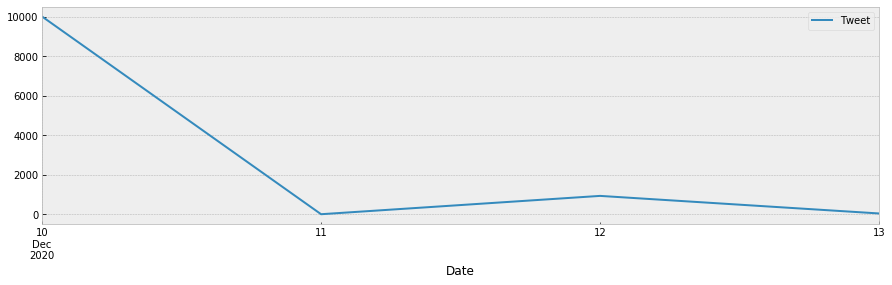

In [146]:
dataSet_tweets['Date'] = pd.to_datetime(dataSet_tweets['Date'])

# plot a time series
(dataSet_tweets[['Date','Tweet']]
 .set_index('Date')
 # 'ms' = minute
 .resample('D')
 .count()
 .rename(columns=dict(text='1-minute counts'))
 .plot(figsize=(15,4))
);

<u><font color="#DE26B6" face="Bitstream Vera Serif Bold" size="5">3. Préparation des données</font></u>


Les données collectées doivent être "préparées". Avant tout, ellesd oivent être nettoyées puisqu’elles peuvent contenir
plusieurs types d’anomalies : des données peuvent être omises à cause des erreurs de frappe ou à causes des erreursdues
au système lui-même, dans ce cas il faut remplacer ces données ou éliminer complètement leurs enregistrements. 
Des données peuvent être incohérentes c-à-d qui sortent des intervalles permis, on doit les écarter où les normaliser.
Parfois on est obligé à faire des transformations sur les données pour unifier leur poids.

In [147]:
#Supprimer les lignes dupliquées
dataSet_tweets.drop_duplicates('Tweet')
dataSet_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10965 entries, 0 to 10964
Data columns (total 5 columns):
ID       10965 non-null int64
User     10965 non-null object
Date     10965 non-null datetime64[ns]
Tweet    10965 non-null object
Len      10965 non-null int64
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 428.4+ KB


==> Dans notre projet on est besoin de La colonne Tweets seulement pour faire l'analyse 

In [148]:
dataSet_tweets=dataSet_tweets.drop(columns = ['ID','User','Len'])

<u><font color="#0316E2"  size="3"> Nettoyage des textes</font></u>
<p>  faut supprimer les ponctuations, les liens, hashtags, RT, les émojis, les caractères spéciaux, les chiffres</p>

In [149]:
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [150]:
def cleanText(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = text.lower() # Makes text lowercase
    text = re.sub("http\S+", "", text)
    text = re.sub('[0-9]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text) # Removes hyperlinks
    text = re.sub('#', '', text) # Removes hashtags
    text = re.sub('@[A-Za-z0–9]+', '', text) # Removes mentions (@)
    text = re.sub('RT[\s]+', '', text) # Removes "RT"
    text = re.sub(r"@\S+", '', text)
    text = re.sub(r"\n+", '', text)
    text = re.sub("RT+", '', text)
    text = re.sub("rt[\s]+", '', text)
    text = re.sub("hhh+", '', text)  
    
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    text = re.sub(emoji_pattern, '', text)
    
    return text


In [151]:
dataSet_tweets['Tweet_punct'] = dataSet_tweets['Tweet'].apply(lambda x: cleanText(x))

In [152]:
style_dict2 = {'background-color':'#4ACDF9',
              'color':'black',
              'border-color': 'white',
              'border-width':'2px',
              'font-family':'Roboto'}

dataSet_tweets.head(7).style.set_properties(**style_dict2)





,Date,Tweet,Tweet_punct
0,2020-12-10 02:22:59,I wish every band would find success :(,i wish every band would find success
1,2020-12-10 02:22:59,"RT @Franklin_Graham: Concerns with the voting machines, software, mail-in ballots, counting procedures, and more seem to be growing every d…",franklingraham concerns with the voting machines software mailin ballots counting procedures and more seem to be growing every d…
2,2020-12-10 02:22:59,That’s more like it https://t.co/vMgy7wuOnl,that’s more like it
3,2020-12-10 02:22:59,"three hours into ambien and tweeting and she gives you this look, wyd https://t.co/YwzAbalKM4",three hours into ambien and tweeting and she gives you this look wyd
4,2020-12-10 02:22:59,RT @BBCWorld: New Christmas campaign for Canadians held in China https://t.co/ke7qlriuGc,bbcworld new christmas campaign for canadians held in china
5,2020-12-10 02:22:59,RT @susie_dent: Word of the day is ‘ultracrepidarian’ (19th century): a presumptuous critic; one who gives opinions and advice on subjects…,susiedent word of the day is ‘ultracrepidarian’ th century a presumptuous critic one who gives opinions and advice on subjects…
6,2020-12-10 02:22:59,@Roland_sanchez2 @Feet1100 um really is I can advertise if I want to. fuck off,rolandsanchez feet um really isi can advertise if i want to fuck off


<hr>
<u><font color="#1E9CC6" face="Edwardian Script ITC" size="22"> NLP:Natural LanguageProcessing</font></u>
<hr>

Le NLP pour Natural Language Processing ou Traitement Numérique du Langage est une discipline qui porte essentiellement sur la
compréhension, la manipulation et la génération du langage naturel par les machines.  Ainsi, le NLP est réellement à l’interface entre la science informatique et la linguistique. Il porte donc sur la capacité de la machine à interagir 
directement avec l’humain.

<hr>
<u><font color="#9E0893" face="Bitstream Vera Serif Bold" size="6"> les différentes étapes du NLP
</font></u>


<u><font color="#A40B99" face="Open Sans" size="5"> 1.Tokenisation</font></u>
<hr>
<p>Passons à la Tokénization ! C’est un procédé très simple qui divise une chaîne de caractère en tokens, c’est-à-dire des éléments atomiques de la chaîne. Un token n’est pas forcément un mot, ce peut être par exemple un signe de ponctuation. NLTK fournit plusieurs types de tokénization, comme la tokénization par mot ou par phrase.</p>

==>On doit procéder à l’analyse du tweet en respectant les différentes étapes du NLP

In [153]:
from nltk.tokenize import word_tokenize

dataSet_tweets['Tweet_tokenized'] = dataSet_tweets['Tweet_punct'].apply(lambda x: word_tokenize(x.lower()))

style_dict3 = {'background-color':'#6BD6FA',
              'color':'black',
              'border-color': 'white',
              'border-width':'2px',
              'font-family':'Roboto'}

dataSet_tweets.head(7).style.set_properties(**style_dict3)


,Date,Tweet,Tweet_punct,Tweet_tokenized
0,2020-12-10 02:22:59,I wish every band would find success :(,i wish every band would find success,"['i', 'wish', 'every', 'band', 'would', 'find', 'success']"
1,2020-12-10 02:22:59,"RT @Franklin_Graham: Concerns with the voting machines, software, mail-in ballots, counting procedures, and more seem to be growing every d…",franklingraham concerns with the voting machines software mailin ballots counting procedures and more seem to be growing every d…,"['franklingraham', 'concerns', 'with', 'the', 'voting', 'machines', 'software', 'mailin', 'ballots', 'counting', 'procedures', 'and', 'more', 'seem', 'to', 'be', 'growing', 'every', 'd…']"
2,2020-12-10 02:22:59,That’s more like it https://t.co/vMgy7wuOnl,that’s more like it,"['that', '’', 's', 'more', 'like', 'it']"
3,2020-12-10 02:22:59,"three hours into ambien and tweeting and she gives you this look, wyd https://t.co/YwzAbalKM4",three hours into ambien and tweeting and she gives you this look wyd,"['three', 'hours', 'into', 'ambien', 'and', 'tweeting', 'and', 'she', 'gives', 'you', 'this', 'look', 'wyd']"
4,2020-12-10 02:22:59,RT @BBCWorld: New Christmas campaign for Canadians held in China https://t.co/ke7qlriuGc,bbcworld new christmas campaign for canadians held in china,"['bbcworld', 'new', 'christmas', 'campaign', 'for', 'canadians', 'held', 'in', 'china']"
5,2020-12-10 02:22:59,RT @susie_dent: Word of the day is ‘ultracrepidarian’ (19th century): a presumptuous critic; one who gives opinions and advice on subjects…,susiedent word of the day is ‘ultracrepidarian’ th century a presumptuous critic one who gives opinions and advice on subjects…,"['susiedent', 'word', 'of', 'the', 'day', 'is', '‘', 'ultracrepidarian', '’', 'th', 'century', 'a', 'presumptuous', 'critic', 'one', 'who', 'gives', 'opinions', 'and', 'advice', 'on', 'subjects…']"
6,2020-12-10 02:22:59,@Roland_sanchez2 @Feet1100 um really is I can advertise if I want to. fuck off,rolandsanchez feet um really isi can advertise if i want to fuck off,"['rolandsanchez', 'feet', 'um', 'really', 'isi', 'can', 'advertise', 'if', 'i', 'want', 'to', 'fuck', 'off']"


<u><font color="#A40B99" face="Open Sans" size="5"> 2.Remove Stopwords<font></u>
<hr>

In [154]:
stopword = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text




In [155]:

dataSet_tweets['Tweet_nonstop'] = dataSet_tweets['Tweet_tokenized'].apply(lambda x: remove_stopwords(x))
style_dict3 = {'background-color':'#6BD6FA',
              'color':'black',
              'border-color': 'white',
              'border-width':'2px',
              'font-family':'Roboto'}

dataSet_tweets.head(7).style.set_properties(**style_dict3)

,Date,Tweet,Tweet_punct,Tweet_tokenized,Tweet_nonstop
0,2020-12-10 02:22:59,I wish every band would find success :(,i wish every band would find success,"['i', 'wish', 'every', 'band', 'would', 'find', 'success']","['wish', 'every', 'band', 'would', 'find', 'success']"
1,2020-12-10 02:22:59,"RT @Franklin_Graham: Concerns with the voting machines, software, mail-in ballots, counting procedures, and more seem to be growing every d…",franklingraham concerns with the voting machines software mailin ballots counting procedures and more seem to be growing every d…,"['franklingraham', 'concerns', 'with', 'the', 'voting', 'machines', 'software', 'mailin', 'ballots', 'counting', 'procedures', 'and', 'more', 'seem', 'to', 'be', 'growing', 'every', 'd…']","['franklingraham', 'concerns', 'voting', 'machines', 'software', 'mailin', 'ballots', 'counting', 'procedures', 'seem', 'growing', 'every', 'd…']"
2,2020-12-10 02:22:59,That’s more like it https://t.co/vMgy7wuOnl,that’s more like it,"['that', '’', 's', 'more', 'like', 'it']","['’', 'like']"
3,2020-12-10 02:22:59,"three hours into ambien and tweeting and she gives you this look, wyd https://t.co/YwzAbalKM4",three hours into ambien and tweeting and she gives you this look wyd,"['three', 'hours', 'into', 'ambien', 'and', 'tweeting', 'and', 'she', 'gives', 'you', 'this', 'look', 'wyd']","['three', 'hours', 'ambien', 'tweeting', 'gives', 'look', 'wyd']"
4,2020-12-10 02:22:59,RT @BBCWorld: New Christmas campaign for Canadians held in China https://t.co/ke7qlriuGc,bbcworld new christmas campaign for canadians held in china,"['bbcworld', 'new', 'christmas', 'campaign', 'for', 'canadians', 'held', 'in', 'china']","['bbcworld', 'new', 'christmas', 'campaign', 'canadians', 'held', 'china']"
5,2020-12-10 02:22:59,RT @susie_dent: Word of the day is ‘ultracrepidarian’ (19th century): a presumptuous critic; one who gives opinions and advice on subjects…,susiedent word of the day is ‘ultracrepidarian’ th century a presumptuous critic one who gives opinions and advice on subjects…,"['susiedent', 'word', 'of', 'the', 'day', 'is', '‘', 'ultracrepidarian', '’', 'th', 'century', 'a', 'presumptuous', 'critic', 'one', 'who', 'gives', 'opinions', 'and', 'advice', 'on', 'subjects…']","['susiedent', 'word', 'day', '‘', 'ultracrepidarian', '’', 'th', 'century', 'presumptuous', 'critic', 'one', 'gives', 'opinions', 'advice', 'subjects…']"
6,2020-12-10 02:22:59,@Roland_sanchez2 @Feet1100 um really is I can advertise if I want to. fuck off,rolandsanchez feet um really isi can advertise if i want to fuck off,"['rolandsanchez', 'feet', 'um', 'really', 'isi', 'can', 'advertise', 'if', 'i', 'want', 'to', 'fuck', 'off']","['rolandsanchez', 'feet', 'um', 'really', 'isi', 'advertise', 'want', 'fuck']"


<u><font color="#A40B99" face="Open Sans" size="5"> 3.Stemming and Lemmitization</font></u>
<hr>
<p>Ces deux méthodes sont très couramment utilisées dans le traitement du langage naturel car permettent de représenter sous un même mot plusieurs dérivées du mot. Dans le cas du Stemming, nous allons uniquement garder le radical du mot (ex : dormir, dortoir et dors deviendront dor). La lemmatization, moins radicale , va laisser au mot un sens sémantique mais va éliminer le genre ou le pluriel par exemple.</p>


In [156]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text


In [157]:

dataSet_tweets['Tweet_stemmed'] = dataSet_tweets['Tweet_nonstop'].apply(lambda x: stemming(x))

style_dict5 = {'background-color':'#A9E5F9',
              'color':'black',
              'border-color': 'white',
              'border-width':'2px',
              'font-family':'Roboto'}
#dataSet_tweets.head(7)
dataSet_tweets.head(7).style.set_properties(**style_dict5)

,Date,Tweet,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed
0,2020-12-10 02:22:59,I wish every band would find success :(,i wish every band would find success,"['i', 'wish', 'every', 'band', 'would', 'find', 'success']","['wish', 'every', 'band', 'would', 'find', 'success']","['wish', 'everi', 'band', 'would', 'find', 'success']"
1,2020-12-10 02:22:59,"RT @Franklin_Graham: Concerns with the voting machines, software, mail-in ballots, counting procedures, and more seem to be growing every d…",franklingraham concerns with the voting machines software mailin ballots counting procedures and more seem to be growing every d…,"['franklingraham', 'concerns', 'with', 'the', 'voting', 'machines', 'software', 'mailin', 'ballots', 'counting', 'procedures', 'and', 'more', 'seem', 'to', 'be', 'growing', 'every', 'd…']","['franklingraham', 'concerns', 'voting', 'machines', 'software', 'mailin', 'ballots', 'counting', 'procedures', 'seem', 'growing', 'every', 'd…']","['franklingraham', 'concern', 'vote', 'machin', 'softwar', 'mailin', 'ballot', 'count', 'procedur', 'seem', 'grow', 'everi', 'd…']"
2,2020-12-10 02:22:59,That’s more like it https://t.co/vMgy7wuOnl,that’s more like it,"['that', '’', 's', 'more', 'like', 'it']","['’', 'like']","['’', 'like']"
3,2020-12-10 02:22:59,"three hours into ambien and tweeting and she gives you this look, wyd https://t.co/YwzAbalKM4",three hours into ambien and tweeting and she gives you this look wyd,"['three', 'hours', 'into', 'ambien', 'and', 'tweeting', 'and', 'she', 'gives', 'you', 'this', 'look', 'wyd']","['three', 'hours', 'ambien', 'tweeting', 'gives', 'look', 'wyd']","['three', 'hour', 'ambien', 'tweet', 'give', 'look', 'wyd']"
4,2020-12-10 02:22:59,RT @BBCWorld: New Christmas campaign for Canadians held in China https://t.co/ke7qlriuGc,bbcworld new christmas campaign for canadians held in china,"['bbcworld', 'new', 'christmas', 'campaign', 'for', 'canadians', 'held', 'in', 'china']","['bbcworld', 'new', 'christmas', 'campaign', 'canadians', 'held', 'china']","['bbcworld', 'new', 'christma', 'campaign', 'canadian', 'held', 'china']"
5,2020-12-10 02:22:59,RT @susie_dent: Word of the day is ‘ultracrepidarian’ (19th century): a presumptuous critic; one who gives opinions and advice on subjects…,susiedent word of the day is ‘ultracrepidarian’ th century a presumptuous critic one who gives opinions and advice on subjects…,"['susiedent', 'word', 'of', 'the', 'day', 'is', '‘', 'ultracrepidarian', '’', 'th', 'century', 'a', 'presumptuous', 'critic', 'one', 'who', 'gives', 'opinions', 'and', 'advice', 'on', 'subjects…']","['susiedent', 'word', 'day', '‘', 'ultracrepidarian', '’', 'th', 'century', 'presumptuous', 'critic', 'one', 'gives', 'opinions', 'advice', 'subjects…']","['susied', 'word', 'day', '‘', 'ultracrepidarian', '’', 'th', 'centuri', 'presumptu', 'critic', 'one', 'give', 'opinion', 'advic', 'subjects…']"
6,2020-12-10 02:22:59,@Roland_sanchez2 @Feet1100 um really is I can advertise if I want to. fuck off,rolandsanchez feet um really isi can advertise if i want to fuck off,"['rolandsanchez', 'feet', 'um', 'really', 'isi', 'can', 'advertise', 'if', 'i', 'want', 'to', 'fuck', 'off']","['rolandsanchez', 'feet', 'um', 'really', 'isi', 'advertise', 'want', 'fuck']","['rolandsanchez', 'feet', 'um', 'realli', 'isi', 'advertis', 'want', 'fuck']"


In [158]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text


In [159]:

dataSet_tweets['Tweet_lemmatized'] = dataSet_tweets['Tweet_nonstop'].apply(lambda x: lemmatizer(x))

style_dict6 = {'background-color':'#D4ECF4',
              'color':'black',
              'border-color': 'white',
              'border-width':'2px',
              'font-family':'Roboto'}

dataSet_tweets.head(7).style.set_properties(**style_dict6)

,Date,Tweet,Tweet_punct,Tweet_tokenized,Tweet_nonstop,Tweet_stemmed,Tweet_lemmatized
0,2020-12-10 02:22:59,I wish every band would find success :(,i wish every band would find success,"['i', 'wish', 'every', 'band', 'would', 'find', 'success']","['wish', 'every', 'band', 'would', 'find', 'success']","['wish', 'everi', 'band', 'would', 'find', 'success']","['wish', 'every', 'band', 'would', 'find', 'success']"
1,2020-12-10 02:22:59,"RT @Franklin_Graham: Concerns with the voting machines, software, mail-in ballots, counting procedures, and more seem to be growing every d…",franklingraham concerns with the voting machines software mailin ballots counting procedures and more seem to be growing every d…,"['franklingraham', 'concerns', 'with', 'the', 'voting', 'machines', 'software', 'mailin', 'ballots', 'counting', 'procedures', 'and', 'more', 'seem', 'to', 'be', 'growing', 'every', 'd…']","['franklingraham', 'concerns', 'voting', 'machines', 'software', 'mailin', 'ballots', 'counting', 'procedures', 'seem', 'growing', 'every', 'd…']","['franklingraham', 'concern', 'vote', 'machin', 'softwar', 'mailin', 'ballot', 'count', 'procedur', 'seem', 'grow', 'everi', 'd…']","['franklingraham', 'concern', 'voting', 'machine', 'software', 'mailin', 'ballot', 'counting', 'procedure', 'seem', 'growing', 'every', 'd…']"
2,2020-12-10 02:22:59,That’s more like it https://t.co/vMgy7wuOnl,that’s more like it,"['that', '’', 's', 'more', 'like', 'it']","['’', 'like']","['’', 'like']","['’', 'like']"
3,2020-12-10 02:22:59,"three hours into ambien and tweeting and she gives you this look, wyd https://t.co/YwzAbalKM4",three hours into ambien and tweeting and she gives you this look wyd,"['three', 'hours', 'into', 'ambien', 'and', 'tweeting', 'and', 'she', 'gives', 'you', 'this', 'look', 'wyd']","['three', 'hours', 'ambien', 'tweeting', 'gives', 'look', 'wyd']","['three', 'hour', 'ambien', 'tweet', 'give', 'look', 'wyd']","['three', 'hour', 'ambien', 'tweeting', 'give', 'look', 'wyd']"
4,2020-12-10 02:22:59,RT @BBCWorld: New Christmas campaign for Canadians held in China https://t.co/ke7qlriuGc,bbcworld new christmas campaign for canadians held in china,"['bbcworld', 'new', 'christmas', 'campaign', 'for', 'canadians', 'held', 'in', 'china']","['bbcworld', 'new', 'christmas', 'campaign', 'canadians', 'held', 'china']","['bbcworld', 'new', 'christma', 'campaign', 'canadian', 'held', 'china']","['bbcworld', 'new', 'christmas', 'campaign', 'canadian', 'held', 'china']"
5,2020-12-10 02:22:59,RT @susie_dent: Word of the day is ‘ultracrepidarian’ (19th century): a presumptuous critic; one who gives opinions and advice on subjects…,susiedent word of the day is ‘ultracrepidarian’ th century a presumptuous critic one who gives opinions and advice on subjects…,"['susiedent', 'word', 'of', 'the', 'day', 'is', '‘', 'ultracrepidarian', '’', 'th', 'century', 'a', 'presumptuous', 'critic', 'one', 'who', 'gives', 'opinions', 'and', 'advice', 'on', 'subjects…']","['susiedent', 'word', 'day', '‘', 'ultracrepidarian', '’', 'th', 'century', 'presumptuous', 'critic', 'one', 'gives', 'opinions', 'advice', 'subjects…']","['susied', 'word', 'day', '‘', 'ultracrepidarian', '’', 'th', 'centuri', 'presumptu', 'critic', 'one', 'give', 'opinion', 'advic', 'subjects…']","['susiedent', 'word', 'day', '‘', 'ultracrepidarian', '’', 'th', 'century', 'presumptuous', 'critic', 'one', 'give', 'opinion', 'advice', 'subjects…']"
6,2020-12-10 02:22:59,@Roland_sanchez2 @Feet1100 um really is I can advertise if I want to. fuck off,rolandsanchez feet um really isi can advertise if i want to fuck off,"['rolandsanchez', 'feet', 'um', 'really', 'isi', 'can', 'advertise', 'if', 'i', 'want', 'to', 'fuck', 'off']","['rolandsanchez', 'feet', 'um', 'really', 'isi', 'advertise', 'want', 'fuck']","['rolandsanchez', 'feet', 'um', 'realli', 'isi', 'advertis', 'want', 'fuck']","['rolandsanchez', 'foot', 'um', 'really', 'isi', 'advertise', 'want', 'fuck']"


<u><font color="#A40B99" face="Open Sans" size="6"> WordCloud</font></u>

In [160]:

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt

#%matplotlib inline

def word_cloud(wd_list):
    twitter_mask = np.array(Image.open('extras/twitter_mask.png'))
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        mask=twitter_mask,
        background_color="white",
        width=1000,
        height=600,
        contour_width=5, 
        contour_color='dodgerblue',
        #colormap=matplotlib.cm.inferno,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(15, 6))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");


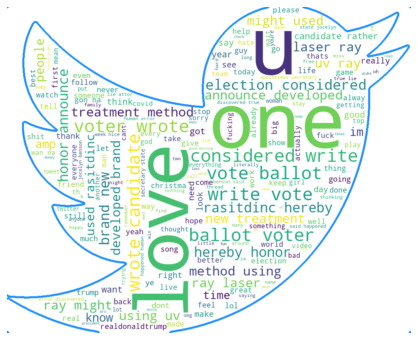

In [161]:
lemma_list_of_words=[]
for i in range(0,dataSet_tweets.shape[0]):
    lemma_array=dataSet_tweets['Tweet_lemmatized'][i]
    lemma_array=' '.join(lemma_array)
    lemma_list_of_words.append(lemma_array)
word_cloud(lemma_list_of_words)

<hr>
Vous le savez peut-être mais les algorithmes n’aiment pas les mots… Heureusement pour nous, il existe des méthodes simples
permettant de convertir un document en une matrice de mot. 

<hr>
<u><font color="#1E9CC6" face="Edwardian Script ITC" size="22"> Classification des tweets</font></u>
<hr>


<u><font color="#A40B99" face="Open Sans" size="5"> La véctorisation</font></u><br>
<hr>

Elle permet de convertir une collection de documents texte en une matrice de nombres de jetons

<img src="extras/vv.png" width="1000" height="30"></img>
<hr>


In [163]:
from sklearn.feature_extraction.text import CountVectorizer
countVectorizer = CountVectorizer() 
countVector = countVectorizer.fit_transform(lemma_list_of_words)
words = countVectorizer.get_feature_names()
print('{} Number of tweets has {} words'.format(countVector.shape[0], countVector.shape[1]))

10965 Number of tweets has 22564 words


 Convert a collection of text documents to a matrix of token counts

In [164]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,aa,aaa,aaaaaaaa,aaaaaaaaa,aaaaaaaaaand,aaaandi,aadandi,aaereign,aamirali,aand,...,าmewsuppasit,านแ,านแล,เนเน,เลยค,แบมแบม,แฮชาน,โอพพ,ไบร,ℝℕℕ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<u><font color="#DE26B6" face="Bitstream Vera Serif Bold" size="5">3. Modélisation</font></u>


Dans cette étape, on doit choisir la bonne technique pour extraire les connaissances (exploration) des données.
Des techniques telles que les réseaux de neurones, les arbres de décision, les réseaux bayésiens, le clustering, ... sont
utilisées. Généralement, l’implémentation se base sur plusieurs de ces techniques, puison choisit le bon résultat. 
Dans le reste de ce rapport on va détailler les différentes techniques utilisées dans l’exploration des données et
l’estimation du modèle.



<img src="extras/DM1.png"  width="700" height="50" ></img>


Dans notre projet on a fait le regroupement des tweets similaires donc il s'agit d'un apprentissage non supervisé car les données ne sont pas étiquetées et pour cela on a utilisé l'algorithme de clustering <u> KMEANS</u>

<u><font color="#A40B99" face="Open Sans" size="5"> L'algorithme KMEANS</font></u><br>
<hr>
K-means (ou K-moyennes) : C’est l’un des algorithmes de clustering les plus répandus. Il permet d’analyser un jeu de données caractérisées par un ensemble de descripteurs, afin de regrouper les données “similaires” en groupes (ou clusters).


In [165]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import logging
array = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
inertias = []
sil_scores = []
#fit the models, save the evaluation metrics from each run
for i in array:
    #logging.warning('fitting model for {} clusters'.format(i))
    model = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    model.fit(countVector)
    labels = model.labels_
    sil_scores.append(silhouette_score(countVector, labels))
    inertias.append(model.inertia_)


In [166]:
common_words = model.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print('Cluster' ,str(num) + ' : ' + ', '.join(words[word] for word in centroid))

Cluster 0 : swung, voter, major, leave, according, remainers, since, politicspollss, tory, election, labour, last, pol, geetv, geezlais, gelo, gelles, gem, gemchaserz, gemesss, gemini, geminiblm, geminifeed, gemsofbollywood, gen
Cluster 1 : stop, making, deal, fraud, everything, give, big, mental, trump, virus, hel, donnie, jenki, get, stopping, slytherjennie, lie, realdonaldtrump, love, shipper, paigecams, challenge, gemini, gem, gemchaserz
Cluster 2 : epochtimes, human, said, benson, secretary, happened, discovered, lie, true, state, jocelyn, error, attor, gelles, gelo, gem, ℝℕℕ, gemchaserz, gemesss, geminiblm, geminifeed, gemsofbollywood, gen, gender, gene
Cluster 3 : want, dont, like, body, people, know, nicer, get, see, really, look, would, life, christmas, men, girl, im, live, one, woman, say, someone, go, good, give
Cluster 4 : believe, supremacy, historia, reiss, ℝℕℕ, gen, gem, gemchaserz, gemesss, gemini, geminiblm, geminifeed, gemsofbollywood, gene, gender, gelles, geneenviro

Dans l'apprentissage non supervisé, nous ne pouvons pas facilement calculer (et optimiser) un score de précision, nous devons donc utiliser d'autres techniques pour comparer les modèles les uns aux autres pour la sélection k. Puisque nous ne connaissons pas ce nombre a priori , une technique consiste à comparer la valeur d'une métrique de qualité sur une plage de ks potentiels . Il existe un certain nombre de mesures de qualité connues , dont nous n'utiliserons que quelques- unes :<u>le score de silhouette</u> (plus grand est meilleur) et <u>l'inertie (plus petit est meilleur)</u>

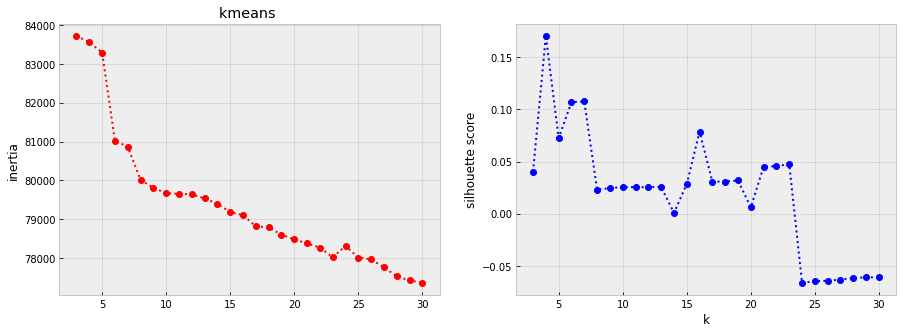

In [167]:
%matplotlib inline
# plot the quality metrics for inspection
fig, ax = plt.subplots(1, 2, sharex=True,figsize=(15,5))

plt.subplot(121)
plt.plot(array, inertias, 'r:o')
plt.ylabel('inertia')
plt.title('kmeans ')

plt.subplot(122)
plt.plot(array, sil_scores, 'b:o')
plt.ylabel('silhouette score')
plt.xlabel('k');

Pour l'instant, partons avec notre meilleure valeur k=16, formons un nouveau modèle sur toutes nos données et continuons notre analyse.

In [184]:
best_k = 16
km= KMeans(n_clusters=best_k,init='k-means++',n_jobs=-1,max_iter=300,n_init=10,random_state=42)
clu=km.fit_predict(countVector)

C:\Users\Nourhene\AppData\Roaming\Python\Python37\site-packages\sklearn\cluster\_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


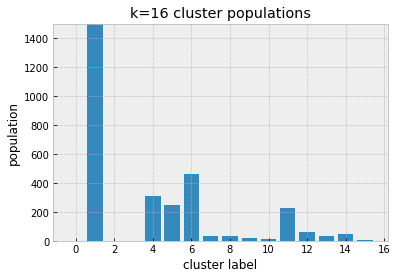

In [185]:
plt.bar(range(len(set(km.labels_))), np.bincount(km.labels_))
plt.ylabel('population')
plt.xlabel('cluster label')
plt.title('k={} cluster populations'.format(best_k));
# truncating the axis again!
plt.ylim(0,1500);

In [186]:
common_words =km.cluster_centers_.argsort()[:,-1:-26:-1]
for num, centroid in enumerate(common_words):
    print('Cluster' ,str(num) + ' : ' + ', '.join(words[word] for word in centroid))


Cluster 0 : best, asteadwesley, night, thats, mariah, carey, medal, craziest, like, christmas, holy, bronze, pais, ge, gemsofbollywood, gemesss, gdevera, gemini, gdelaurentiis, geminiblm, geminifeed, gen, gem, gender, gene
Cluster 1 : love, get, im, people, year, good, know, amp, day, time, want, trump, got, election, state, new, go, would, album, please, need, make, realdonaldtrump, think, dont
Cluster 2 : realdonaldtrump, white, booted, ho, erictrump, get, theeliasrework, retweet, love, gelo, gelles, geminifeed, gemchaserz, gemesss, gemini, geminiblm, gem, ℝℕℕ, gemsofbollywood, gen, gender, gene, geneenvironment, geneprincipe, general
Cluster 3 : look, like, street, natemcdermott, january, elderly, na, vaccine, gon, one, gemchaserz, geezlais, general, gelles, gelo, geneprincipe, gem, gen, gemsofbollywood, geneenvironment, gemini, gene, gender, geminiblm, geminifeed
Cluster 4 : one, day, album, get, year, amp, good, person, gaon, best, border, first, got, give, step, people, time, cop

<u><font color="#A40B99" face="Open Sans" size="5"> Visualisation</font></u><br>
<hr>

Enfin, nous pourrions vouloir regarder une représentation graphique de nos résultats pour obtenir un autre contrôle sur ce que nous avons découvert.

Une approche courante pour ce faire consiste à utiliser t-SNE pour créer une vue en 2 ou 3 dimensions des données. Le t-SNE tente de maintenir - dans la représentation de dimension inférieure - une partie de la structure relative présente dans les données originales de haute dimensionnalité.

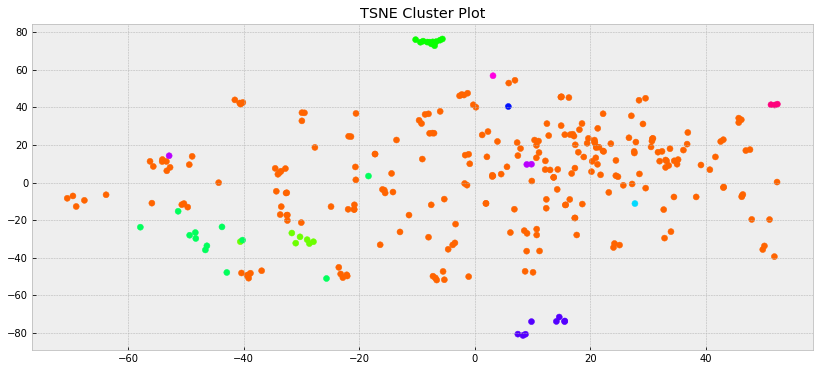

In [196]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.cm as cm
def plot_tsne(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 1, figsize=(14, 6))
    
    plt.scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    plt.title('TSNE Cluster Plot')
    
plot_tsne(countVector, clu)

 
<hr>
<u><font color="#1E9CC6" face="Edwardian Script ITC" size="22"> Conclusion</font></u>
<hr>


<u><b>Twitter</u></b> est une source précieuse de données sur ce qui se passe dans le monde. Les données riches disponibles via la suite d'API fournissent une vue détaillée des personnes et du contenu de la plate-forme. Dans ce didacticiel, nous avons travaillé sur un exemple de flux de travail de bout en bout - de la collecte de données à partir de l'API Twitter à la création et à l'inspection d'un modèle d'utilisateurs de Twitter. En cours de route, nous avons montré comment identifier et utiliser les éléments pertinents de la charge utile de données, comment convertir ces données dans un format compatible avec de nombreuses bibliothèques d'apprentissage automatique et comment inspecter les modèles résultants pour leur interprétabilité. Plus précisément, nous avons <u><b>collecté des données csv</u></b> correspondantes, <u><b>analysé ces données</u></b> pour <u><b>extraire des informations</u></b> spécifiques à l'utilisateur, <u><b>appliqué des algorithmes de clustering</u></b> aux données texte,et <u><b>évalué le modéle choisi<u><b>

<img src="extras/rea.gif" width="200" height="50"></img>
<hr>
<img src="extras/nou.gif" ></img>
<hr>

In [171]:
%load_ext watermark
%watermark --iversions


The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
seaborn    0.9.0
matplotlib 3.1.1
numpy      1.16.5
PIL.Image  6.2.0
logging    0.5.1.2
re         2.2.1
pandas     0.25.1
tweepy     3.9.0
nltk       3.4.5

